## 1. Data Cleaning ##
To clean the imported data, I started by removing unnecessary columns. These were the columns that weren't required for calculating the COVID-19 proportions.
All of the values in the dataset were **string**s, so I removed all commas from the data and converted the necessary columns to be of numeric type.
The dataset included some **Nan** values, which I decided to change to **0**.

In [31]:
# Import modules
import pandas as pd
import numpy as np

# Create data frame
data_frame = pd.read_csv('data/covid-data.csv')

# Remove unnecessary columns
columns_to_drop = ['Total Cases/1 mil population', 'Death/1 mil population', 'Total Cases.1', 'Tests/1 mil population']
data_frame.drop(columns=columns_to_drop, inplace=True)

# Remove commas from numerical data
total_cases = data_frame['Total Cases'].str.replace(',', '')
total_deaths = data_frame['Total Deaths'].str.replace(',', '')
total_recovered = data_frame['Total Recovered'].str.replace(',', '')
active_cases = data_frame['Active Cases'].str.replace(',', '')
population = data_frame['Population'].str.replace(',', '')

# Set column types to numeric
data_frame['Total Cases'] = pd.to_numeric(total_cases)
data_frame['Total Deaths'] = pd.to_numeric(total_deaths)
data_frame['Total Recovered'] = pd.to_numeric(total_recovered)
data_frame['Active Cases'] = pd.to_numeric(active_cases)
data_frame['Population'] = pd.to_numeric(population)

# Replace nan values with 0
data_frame = data_frame.fillna(0)
data_frame

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Population
0,California,3803789,63190,2065555.0,1675044.0,39512223
1,Texas,2979334,52169,2871132.0,56033.0,28995881
2,Florida,2346153,37265,2009593.0,299295.0,21477737
3,New York,2163931,53876,1822940.0,287115.0,19453561
4,Illinois,1387760,25490,1332924.0,29346.0,12671821
5,Pennsylvania,1213374,27602,1160335.0,25437.0,12801989
6,Georgia,1128870,21158,1026150.0,81562.0,10617423
7,Ohio,1107225,20091,1076774.0,10360.0,11689100
8,New Jersey,1019794,26334,947404.0,46056.0,8882190
9,North Carolina,1008926,13292,989649.0,5985.0,10488084


## 2. Calculate COVID-19 Rate

In [32]:
# Create new columns and calculate proportions
data_frame['Total Cases / Population'] = data_frame['Total Cases'] / data_frame['Population']
data_frame['Total Deaths / Population'] = data_frame['Total Deaths'] / data_frame['Population']
data_frame['Total Recovered / Population'] = data_frame['Total Recovered'] / data_frame['Population']
data_frame['Active Cases / Population'] = data_frame['Active Cases'] / data_frame['Population']
data_frame

,State,Total Cases,Total Deaths,Total Recovered,Active Cases,Population,Total Cases / Population,Total Deaths / Population,Total Recovered / Population,Active Cases / Population
0,California,3803789,63190,2065555.0,1675044.0,39512223,0.096269,0.001599,0.052276,0.042393
1,Texas,2979334,52169,2871132.0,56033.0,28995881,0.102750,0.001799,0.099019,0.001932
2,Florida,2346153,37265,2009593.0,299295.0,21477737,0.109237,0.001735,0.093566,0.013935
3,New York,2163931,53876,1822940.0,287115.0,19453561,0.111236,0.002769,0.093707,0.014759
4,Illinois,1387760,25490,1332924.0,29346.0,12671821,0.109515,0.002012,0.105188,0.002316
5,Pennsylvania,1213374,27602,1160335.0,25437.0,12801989,0.094780,0.002156,0.090637,0.001987
6,Georgia,1128870,21158,1026150.0,81562.0,10617423,0.106322,0.001993,0.096648,0.007682
7,Ohio,1107225,20091,1076774.0,10360.0,11689100,0.094723,0.001719,0.092118,0.000886
8,New Jersey,1019794,26334,947404.0,46056.0,8882190,0.114813,0.002965,0.106663,0.005185
9,North Carolina,1008926,13292,989649.0,5985.0,10488084,0.096197,0.001267,0.094359,0.000571


## 3. Visualization ##


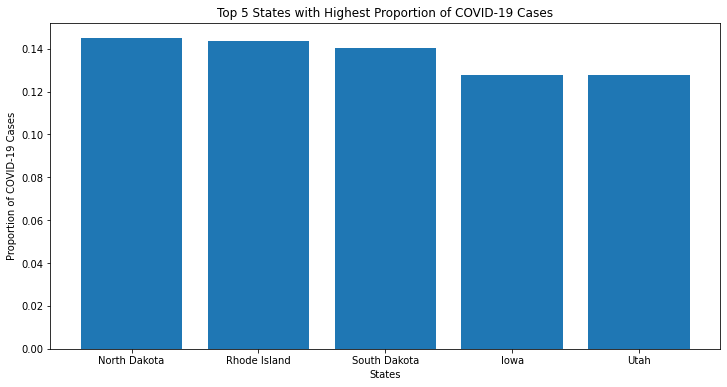

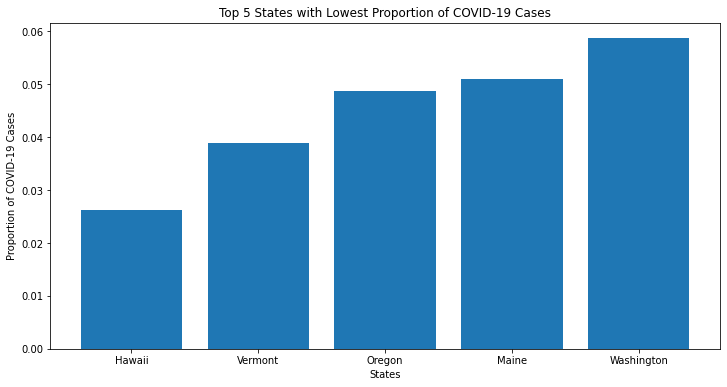

In [33]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_5_highest_props = data_frame.sort_values('Total Cases / Population', ascending=False).head(5)
x = range(5)
plt.bar(x, top_5_highest_props['Total Cases / Population'])
plt.xticks(x, top_5_highest_props['State'])
plt.xlabel('States')
plt.ylabel('Proportion of COVID-19 Cases')
plt.title('Top 5 States with Highest Proportion of COVID-19 Cases')
plt.show()

plt.figure(figsize=(12, 6))
top_5_lowest_props = data_frame.sort_values('Total Cases / Population', ascending=True).head(5)
x = range(5)
plt.bar(x, top_5_lowest_props['Total Cases / Population'])
plt.xticks(x, top_5_lowest_props['State'])
plt.xlabel('States')
plt.ylabel('Proportion of COVID-19 Cases')
plt.title('Top 5 States with Lowest Proportion of COVID-19 Cases')
plt.show()
